## Get the data and check it

In [1]:
# This command allows plots to appear in the jupyter notebook.
%matplotlib inline  
# Import the pandas package and load the cleaned json file into a dataframe called df.
import pandas as pd
df_input = pd.read_json('JEOPARDY_QUESTIONS1_cleaned.json')
# Division is float division
from __future__ import division

In [2]:
# Check on the dataframe.
pd.set_option('max_colwidth', 300)
df_input.head()

,air_date,answer,category,question,round,show_number,value
0,2004-12-31T00:00:00.000Z,Copernicus,HISTORY,"For the last 8 years of his life, Galileo was under house arrest for espousing this man's theory",Jeopardy!,4680,200.0
1,2004-12-31T00:00:00.000Z,Jim Thorpe,ESPN's TOP 10 ALL-TIME ATHLETES,"No. 2: 1912 Olympian; football star at Carlisle Indian School; 6 MLB seasons with the Reds, Giants & Braves",Jeopardy!,4680,200.0
10,2004-12-31T00:00:00.000Z,Jackie Gleason,EPITAPHS & TRIBUTES,"""And away we go""",Jeopardy!,4680,400.0
100,2010-07-06T00:00:00.000Z,a German Shepherd,JUST THE FACTS,This dog breed seen here is a loyal and protective companion,Double Jeopardy!,5957,1200.0
1000,2000-05-04T00:00:00.000Z,Vanessa Williams,MR. OR MS. WILLIAMS,This devoted mom has been called the most famous Miss America of all time,Double Jeopardy!,3619,2000.0


(Notice the fourth question about German Shepherd. This is the question that helped me find the regular expression error in my previous post.)

In [3]:
# Check the data types
df_input.dtypes

air_date        object
answer          object
category        object
question        object
round           object
show_number      int64
value          float64
dtype: object

In [4]:
# Let's convert air_date to date/time, rather than a string.
df_input['air_date'] = pd.to_datetime(df_input['air_date'], yearfirst= True)

In [5]:
# Check data types again.
df_input.dtypes

air_date       datetime64[ns]
answer                 object
category               object
question               object
round                  object
show_number             int64
value                 float64
dtype: object

In [6]:
# Make sure all the data is still there.
df_input.count()

air_date       216930
answer         216930
category       216930
question       216930
round          216930
show_number    216930
value          213296
dtype: int64

In [7]:
# Let's only look at the years where the data is well-sampled.
df1 = df_input[(df_input['air_date'] >= '01-01-1997') & (df_input['air_date'] <= '12-31-2000')]
df2 = df_input[(df_input['air_date'] >= '01-01-2004') & (df_input['air_date'] <= '12-31-2011')]
df = pd.concat([df1, df2])

## State of Jeopardy

One thing I noticed when looking at the categories is that *geography* seems to be a recurring topic. Is there a way I can find a common theme among the geography questions? Since geography is a large topic, I decided to narrow my focus and only look at questions where the answer was a U.S. state.

In [8]:
# Geography is a common theme for Jeopardy categories.
# What are the top categories?
category_counts = df['category'].value_counts() 
category_counts[:15]

BEFORE & AFTER             413
SCIENCE                    276
LITERATURE                 257
AMERICAN HISTORY           255
WORD ORIGINS               252
POTPOURRI                  236
COLLEGES & UNIVERSITIES    224
BODIES OF WATER            220
AMERICANA                  214
U.S. CITIES                207
WORLD CAPITALS             206
STUPID ANSWERS             205
RHYME TIME                 199
WORLD HISTORY              199
COMMON BONDS               192
Name: category, dtype: int64

In [9]:
# How many questions are in the most popular category "BEFORE & AFTER"?
a = df['question'].count()
b = df[df['category']=='BEFORE & AFTER']['question'].count()
print "Total :", a
print "Before and After:", b
print "Percentage:", float(b)/float(a)

Total : 162384
Before and After: 413
Percentage: 0.00254335402503


About 0.25% of the questions in the dataset are from the BEFORE & AFTER category. How does this compare to the number of questions with a U.S. state as an answer? First, let's create a dataframe with only U.S. states as answers.

In [10]:
list_of_states = ['Alabama','Alaska','Arizona','Arkansas','California', 
                  'Colorado','Connecticut', 'Delaware', 'Florida','Georgia',
                  'Hawaii','Idaho','Illinois','Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
                  'Michigan','Minnesota','Mississippi', 'Missouri','Montana','Nebraska', 
                  'Nevada','New Hampshire', 'New Jersey','New Mexico', 'New York',
                  'North Carolina', 'North Dakota','Ohio','Oklahoma', 'Oregon',
                  'Pennsylvania', 'Rhode Island','South Carolina', 'South Dakota',
                  'Tennessee','Texas','Utah','Vermont', 'Virginia', 'Washington', 
                  'West Virginia', 'Wisconsin', 'Wyoming']
len(list_of_states)

50

In [11]:
# Create new dataframe with only states as answers.
state_answers = df[df['answer'].isin(list_of_states)]

In [12]:
# How many of the data set questions have U.S. states as an answer?
c = state_answers['question'].count()
print "Total :", a
print "States:", c
print "Percentage:", float(c)/float(a)

Total : 162384
States: 2887
Percentage: 0.0177788452064


The top category, BEFORE & AFTER, contains 0.25% of all the questions in the dataset. Questions about U.S. states are actually more popular, making up 1.8% of answers in the dataset.

In [13]:
# Let's take a look at some of these questions.
state_answers.head()

,air_date,answer,category,question,round,show_number,value
1001,2000-05-04,Tennessee,AIN'T THAT AMERICA,From 1784 to 1788 the eastern part of this state was a separate state called Franklin,Double Jeopardy!,3619,2000.0
100165,1999-01-04,Hawaii,CLOTHES MAKE THE LAND,It's the U.S. state where you'll find the native skirts seen here (grass skirts),Jeopardy!,3301,200.0
100950,1999-01-15,Georgia,NATIONAL MONUMENTS,Ocmulgee National Monument at Macon in this state preserves some prehistoric & historic Indian villages,Double Jeopardy!,3310,800.0
100962,1999-01-15,Arizona,NATIONAL MONUMENTS,Organ Pipe Cactus National Monument is the largest of the 13 national monuments in this SW state,Double Jeopardy!,3310,1600.0
101390,1997-07-18,Virginia,AMERICANA,"Shoppers, take note: the Potomac Mills discount mall is this state's No. 1 tourist destination",Jeopardy!,2985,200.0


## California is the most popular U.S. state

What is the most popular state? Are some states more popular than others? If so, how much more popular?

In [14]:
# Count up how many answers there are for each state. 
# Sort them and print last few.
count_state_answers = state_answers.answer.value_counts()
count_state_answers.sort_values().tail()

Florida       113
Alaska        115
Texas         116
Hawaii        116
California    133
Name: answer, dtype: int64

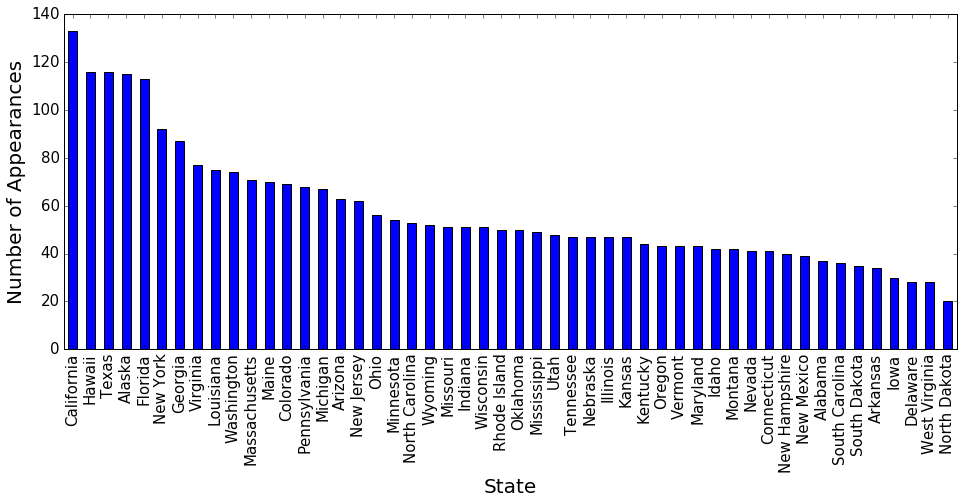

In [15]:
# Let's plot the counts too.
ax = count_state_answers.plot(kind='bar', figsize=(16,6), fontsize = 15)
ax.set_xlabel("State",fontsize = 20)
ax.set_ylabel("Number of Appearances",fontsize = 20);

Certain states seem to appear more frequently than other states. Why is that? 

My first thought was that it's somehow related to [population](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population). The most populous states in the U.S. are California, Texas, and Florida. But, Alaska and Hawaii are the 11th and 3rd *least* populous states. So, population doesn't appear to track with a state's popularity on Jeopardy, but it seems somewhat related. I want to look into this metric in more detail, but before I get ahead of myself, let's make sure that the numbers I am seeing are significant.

I'll test this with the  ["goodness-of-fit test"](https://cnx.org/contents/MBiUQmmY@18.54:0kBuhjul@5/Goodness-of-Fit-Test). This will let me compare the observed and expected values. I'll use the expected values to be a flat distribution. This means that the null hypothesis is that every state is equally likely to appear on Jeopardy. The alternative hypothesis is that they are not equally popular. Here is the definition of the statistic $\chi ^2$

$ \chi ^2 = \sum \frac{(O-E)^2}{E}$

where $O$ is the observed value and $E$ is the expected value. Luckily the [scipy package has a function for calculating this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html).

In [16]:
from scipy.stats import chisquare
chisq, p = chisquare(count_state_answers)
print 'Chisquare = ', chisq
print 'p = ', p

Chisquare =  552.608590232
p =  2.05724197003e-86


With such a low p-value, we can reject the null hypothesis that the distribution of U.S. states is flat. The trend we see with state popularity is real. 

## Money Money Money!

The point of Jeopardy is to answer questions correctly in order to collect the most money. Let's look at how learning about the states can help you earn that money! 

Let's break it down.

* Should a contestant study the states that appear the most frequently because they are more likely to appear? 

    OR


* Should a contestant study the states that appear less frequently because their dollar amounts are possibly higher than the more popular states?

Let me first look into the relationship between a state's popularity and its average dollar amount. Is there a relationship?

To answer this question, I'll create a new dataframe (`state_data`) that contains information about each state's questions, as opposed to the dataframe I'm using now (`state_answers`) which is organized by question.

In [17]:
# Group the questions about states by their dollar values and find the mean.
avg_values = state_answers.groupby('answer')['value'].mean()
# Put state data together in a single dataframe.
state_data = pd.concat([count_state_answers, avg_values], axis = 1)
state_data.columns = ['total_count', 'value_avg']
state_data.head()

,total_count,value_avg
Alabama,37,837.837838
Alaska,115,699.122807
Arizona,63,952.380952
Arkansas,34,750.000000
California,133,589.473684


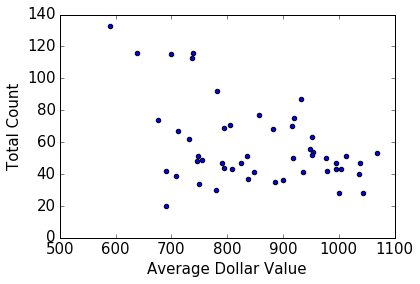

In [18]:
# Plot the relationship between average dollar value 
# and total number of appearances on Jeopardy for each U.S. state.
ax = state_data.plot(x='value_avg', y='total_count',  kind = 'scatter', fontsize = 15)
ax.set_xlabel("Average Dollar Value", fontsize = 15)
ax.set_ylabel("Total Count", fontsize = 15);

The plot seems to show a negative correlation between popularity and dollar amount for U.S. states. Let's [investigate how good of a correlation](https://cnx.org/contents/MBiUQmmY@18.54:DVUc4Pk0@3/Testing-the-Significance-of-th) it is using the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), $r$, with the function [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html).

In [19]:
from scipy.stats import pearsonr
r, pvalue = pearsonr(state_data['value_avg'], state_data['total_count'])
print "p = ", pvalue
print "r = ", r

p =  0.00149233948007
r =  -0.437379909823


Let's take a look at what these $r$ and $p$ values mean. The null hypothesis states that there is no relationship between the variables. However since $p$ is less than 0.05, I'll reject this hypothesis. 

The value of $r$ can range from -1 to +1. A value of 0 indicates that there is no correlation. Negative and positive values indicate negative and positive correlations. In our case, $r$ is negative which agrees with the negative correlation seen in the plot. The value of $r$ indicates the strength of the correlation. As it approaches +1 or -1, the correlation gets stronger. My value of $r$ is not very indicative of a strong correlation.

## When all else fails, fit a line!

I can also investigate the relationship between the average value and the total number of appearances for U.S. states using [linear regression](https://cnx.org/contents/MBiUQmmY@18.54:dGVONwOD@4/Introduction). Although, since I don't have a very strong correlation, I would be hesitant to use this model to make any confident predictions. Let's go through the steps anyway to see what we get. 
[Scikit-learn](http://scikit-learn.org/stable/index.html) has a [useful tool](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for performing this operation.

In [20]:
# Calculate the parameters of the model.
from sklearn.linear_model import LinearRegression
x = state_data['value_avg']
y = state_data['total_count']
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

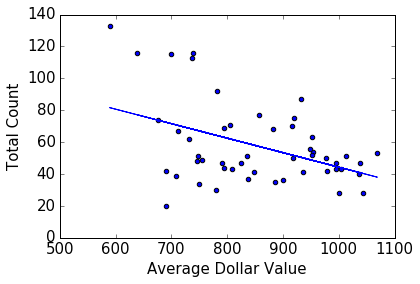

In [21]:
# Plot the best fit line.
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, model.predict(x))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Average Dollar Value", fontsize = 15)
plt.ylabel("Total Count", fontsize = 15);

In [22]:
# Print the equation of the line.
m = (model.predict(1000) - model.predict(500))/500
m=float(m[0])
b = model.predict(1000)-m*1000
b = float(b[0])
print "y = ", m, "x + ", b

y =  -0.090933237871 x +  135.258479027


In [23]:
# Use LinearRegression to get statistics also.
coefdeter = model.score(x,y)
print "Linear Regression r^2 = ", coefdeter
print "Pearson           r^2 = ", r*r

Linear Regression r^2 =  0.191301185517
Pearson           r^2 =  0.191301185517


It's pretty nice that `LinearRegression` will calculate the square of the Pearson $r$ for us. Notice that it agrees with the value calculated previously by `pearsonr`.

## I fit a line. Now what?

Although the fit between the popularity of a state and its average dollar amount is not as tight as I'd like it to be, I'm going to use it anyway to answer the question of whether it's a good idea to focus on studying the *more lucrative, less popular* states, or if it's better to study *less lucrative but more popular* states.

Looking back at the figure above, if you squint, you can see that I have a probability distribution function. For a given average dollar value, I have a predicted number of questions. If I randomly pick a question about a U.S. state, it is more likely to have a lower dollar amount.

Probability distribution function $= mx+b$

where $x$ = dollar amount.

Let's assume this holds for dollar amounts in the range I found for average dollar amounts ~\$600 to ~\$1100, the actual dollar range on Jeopardy.

What if we conduct an experiment? Let's sample from our probability distribution function (PDF) as if we were on Jeopardy. Are we going to make more money if we correctly answer the popular, lower-dollar amount questions or if we correctly answer the rare, higher-dollar value questions right?

I'm going to need to randomly sample from my given probability distribution function. To do that, first I'll have to normalize it. Then I'll calculate the cumulative distribution function (CDF), which I then have to invert. Once I have the inverted CDF, I can use a random number generator to give me numbers between 0 and 1. Finally, I'll plug these random numbers into my inverted CDF and I'll get random numbers that sample my PDF. ([Here's](https://www.comsol.com/blogs/sampling-random-numbers-from-probability-distribution-functions/) a nice explanation of this procedure.)

To investigate this, first I'll normalize this function.

$ A \int^{1100}_{600} (mx+b) dx = 1$

$A (\frac{mx^2}{2} + bx) ]^{x=2000}_{x=200}  =1$

$A [(m/2 \cdot 1100^2  + b \cdot 1100) - (m/2 \cdot 600^2 + b \cdot 600)] = 1$

$ A  = 1/ [(m/2 \cdot 1100^2  + b \cdot 1100) - (m/2 \cdot 600^2 + b \cdot 600)]$ 

Geesh, that's ugly. Let's have the computer deal with this ugliness.

In [24]:
# Normalize the function
upper = 1100.
lower = 600.
A = (  ((m*0.5*upper*upper) + (b*upper))-((m*0.5*lower*lower) + (b*lower))   )
A = 1./A
print A

3.4503444723e-05


The cumulative probability distribution function is just the integral of the PDF.

$PDF = A (mx + b)$

 $CDF = \int{PDF = \int^{x'=x}_{x'=$600}A (mx'+ b)}dx' $

Once we have the CDF, it will be in the form $ y = f(x)$. I'll need to invert it so that it is $x = f(y)$. This will let me plug a random value from 0 to 1 and will output the dollar value which follows my derived PDF.

After some integration, I get the following for the CDF. 

$l =$ \$600

$CDF = A \cdot [0.5 m \cdot x^2 + bx - 0.5 m \cdot l^2 - bl)$



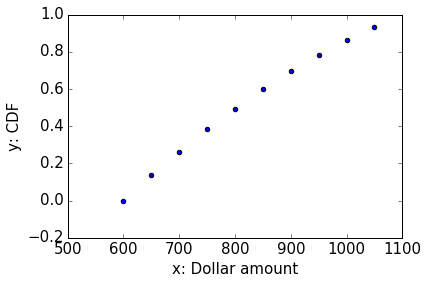

In [25]:
# Plot CDF.
# Input x
x = range(int(lower), int(upper), 50)
# Output y
y = [(0.5*m*float(xx)*float(xx) + b*float(xx) - 0.5*m*lower*lower - b*lower)*A for xx in x]
plt.scatter(x,y)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("x: Dollar amount", fontsize = 15)
plt.ylabel("y: CDF", fontsize = 15);

The next step is to invert the CDF, i.e., solve for $x$. Now, you might have noticed that the CDF is a quadratic function. Awesome! To solve for $x$, I'll need to [complete the squares](https://www.khanacademy.org/math/algebra/quadratics/solving-quadratics-by-completing-the-square/a/completing-the-square-review). Fun! 

Eventually, I end up with...

$ x = \pm \sqrt{(\frac{b^2}{2m} - Q)2/m} -b/m$

where $Q = -y/A - 0.5ml^2 -bl$

Now, I'm pretty confident in my math skills, but not confident enough to move forward without double checking them. So, I plotted the inverted CDF to make sure it matches the original CDF. 

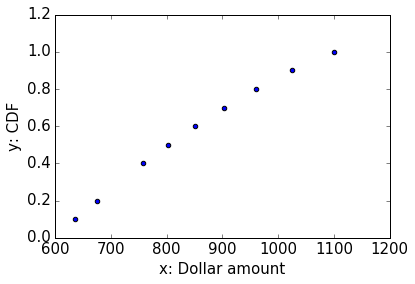

In [26]:
# Plot inverted CDF in order to check MATH.  Plot should look the same as previous plot.
# Plotting will also determine that using the negative sign is the way to go.
# Input y
yy = [0.1,0.2, 0.4,0.5, 0.6, 0.7,0.8,0.9,1.]
# Output x
QQ = [-y/A -0.5*m*lower*lower -b*lower for y in yy]
x = [((((b*b/2./m -Q)*2./m)**(0.5))*-1.)-(b/m) for Q in QQ]
plt.scatter(x,yy)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("x: Dollar amount", fontsize = 15)
plt.ylabel("y: CDF", fontsize = 15);

The plot looks good. Let's go ahead and define a function that will calculate the inverse of the CDF.

In [27]:
# Function calculates the inverse of the CDF. yy is the input vector. x is the output vector. 
# A, b,m, and lower are all parameters
def CDF(yy,x,A, b,m, lower):
    QQ = [-y/A -0.5*m*lower*lower -b*lower  for y in yy]
    x = [((((b*b/2./m -Q)*2./m)**(0.5))*-1.)-(b/m) for Q in QQ]
    return x

## Sampling the Distribution Function

Great! Now we can get to the fun part. With the inverted CDF, I can now give it random numbers between 0 and 1 and it will output samples from my original probability distribution function. Let's give it a try.

In [28]:
# Import random number generators
import numpy as np
from numpy.random import random

In [29]:
# Let's start with 5 samples and see the dollar amounts we end up with.
number_of_samples = 5
random0to1 = np.random.uniform(0,1, number_of_samples)
print 'Random numbers between 0 and 1'
print random0to1
y= CDF(random0to1,x,A,b,m,lower)
print 'Dollar amounts sampled from our PDF'
print y


Random numbers between 0 and 1
[ 0.02650412  0.46988939  0.72293803  0.69477467  0.68352009]
Dollar amounts sampled from our PDF
[609.57047256063424, 788.85377918101028, 915.84627344772923, 900.35242846369624, 894.27397854394462]


Awesome! Now back to my main question. Is it better to study states that may appear less frequently but yield a higher per question dollar amount or study more frequently appearing, but less lucrative states? 

I'm going to sample my probability distribution 5 times which represents 5 U.S. state clues per game. For each game, I'll calculate how much money a contestant would earn if she got only all of the high dollar questions correct. Then I'll calculate how much money should would earn if she got only all of the low dollar questions correct. I'll assume one of her other opponents answered the other U.S. states correctly. Of the U.S. state questions offered in a Jeopardy game, how much more money will she have compared to her opponent?

In [30]:
number_of_clues = 5
number_of_games = 300
# Mid way dollar amount. Divides high dollar from low dollar questions.
high_low = (upper-lower)/2.0+lower
bigmoneylist=[]
smallmoneylist=[]
difflist = []
for i in range(number_of_games):
    random0to1 = np.random.uniform(0,1, number_of_clues)
    y= CDF(random0to1,x,A,b,m,lower)
# Sum up total possible money to be earned in 1 game.
    totalmoney = sum(y)
# Sum up low popularity, high dollar amount clues
    bigmoney = 0
# Sum up high popularity, low dollar amount clues
    smallmoney = 0
    for num in y:
        if num >= high_low:
            bigmoney += num 
        else:
            smallmoney += num
    bigmoneylist.append(bigmoney)
    smallmoneylist.append(smallmoney)
    difflist.append((smallmoney-bigmoney)/totalmoney*100)

In [31]:
# Number of bins in histogram
binnum = 5

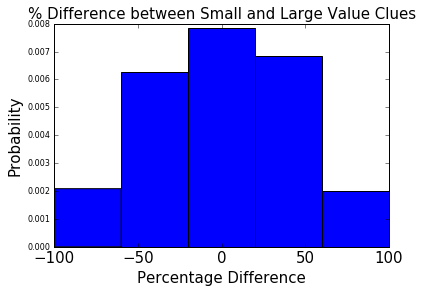

In [32]:
plt.hist(difflist, normed=True, bins=binnum)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 8)
plt.title('% Difference between Small and Large Value Clues', fontsize = 15)
plt.xlabel("Percentage Difference", fontsize = 15)
plt.ylabel('Probability', fontsize = 15);

Let me take a minute to think about this plot. In the positive region from 0-100%, in a single game the Jeopardy player is getting all of the small value clues correctly and her opponent is making money off of the large value clues. In the negative region, our contestant is answering all of the large value clues correctly. So, it looks like the distribution is pretty even. Let's look into the details of this. What is the average? What is the median?

In [33]:
print 'Average:  ', np.mean(difflist)
print 'Median :  ', np.median(difflist)

Average:   8.83056980337
Median :   6.71609281371


Hmm... that's about what I expected from looking at my histogram. Our contestant will earn about 8% more money than her opponent if she studies the popular Jeopardy states and gets all her questions right. I'm guessing that being able to push the buzzer before your opponent who might also know the answer to the popular state questions will probably wash away this 8% bump you might get by your extra studying.  But who knows, it might make the extra difference.